# Example: MNIST Data Set -  Sequential Model

This is an extension of the [Notebook 1 Tutotial](https://github.com/clonker/bms-summerschool19-tf/blob/master/bms-tensorflow-tutorial-1.ipynb).

## Prepare Notebook

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

## Load Data

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

## Data Exploration

Let us plot the firs too images:

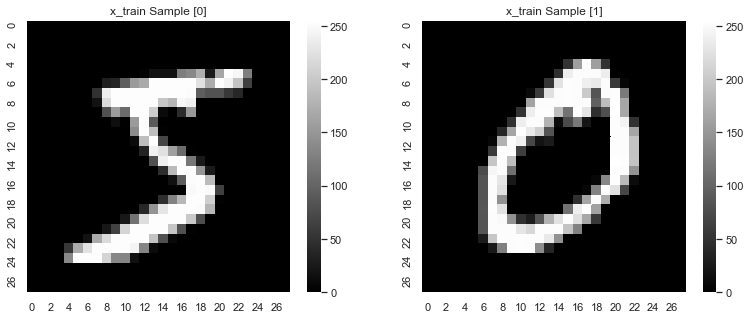

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))

sns.heatmap(data=x_train[0], cmap='gist_gray', ax=ax1)
ax1.set(title='x_train Sample [0]');
sns.heatmap(data=x_train[1], cmap='gist_gray', ax=ax2)
ax2.set(title='x_train Sample [1]');

Let us see the corresponding labels for these two images:

In [7]:
y_train[range(2)]

array([5, 0], dtype=uint8)

In [8]:
classes = np.unique(y_train)

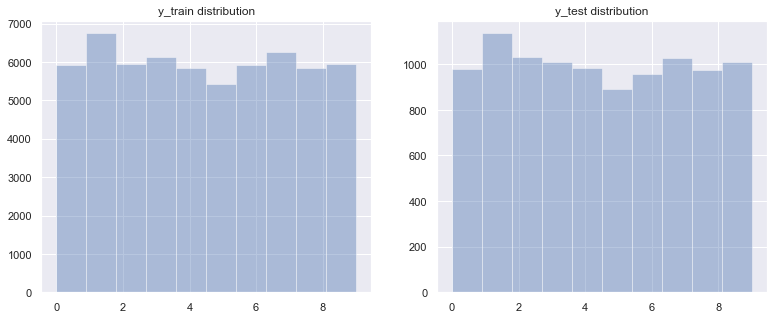

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 5))

sns.distplot(y_train, kde=False, bins=10, ax=ax1)
ax1.set(title='y_train distribution')
sns.distplot(y_test, kde=False, bins=10, ax=ax2)
ax2.set(title='y_test distribution');

## Data Processing 

In [10]:
x_train.max()

255

In [11]:
x_test.max()

255

In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Define Model

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
prediction = model.apply(x_train[0:1])
prediction

<tf.Tensor: id=185, shape=(1, 10), dtype=float32, numpy=
array([[0.07957695, 0.0642444 , 0.07953632, 0.18469286, 0.05313728,
        0.03792338, 0.06698726, 0.09702099, 0.1669301 , 0.16995046]],
      dtype=float32)>

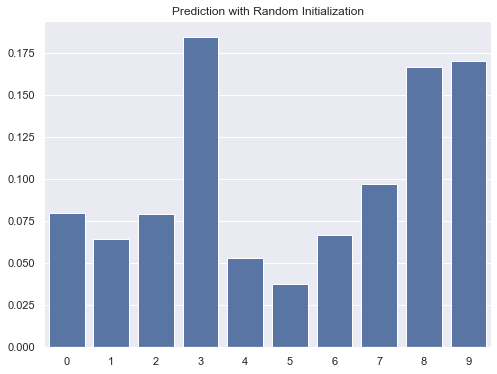

In [15]:
# Plot initial prediction for the first image before any training.
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=classes, y=prediction[0], color='b', ax=ax)
ax.set(title='Prediction with Random Initialization');

Let us plot the model weight before training (random initialization):

In [16]:
len(model.weights)

4

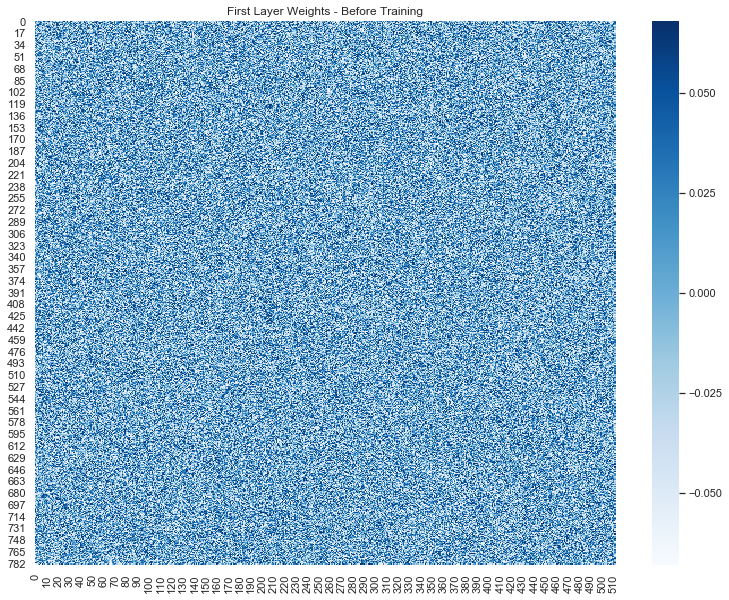

In [17]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(model.weights[0].numpy(), ax=ax, cmap="Blues")
ax.set(title='First Layer Weights - Before Training');

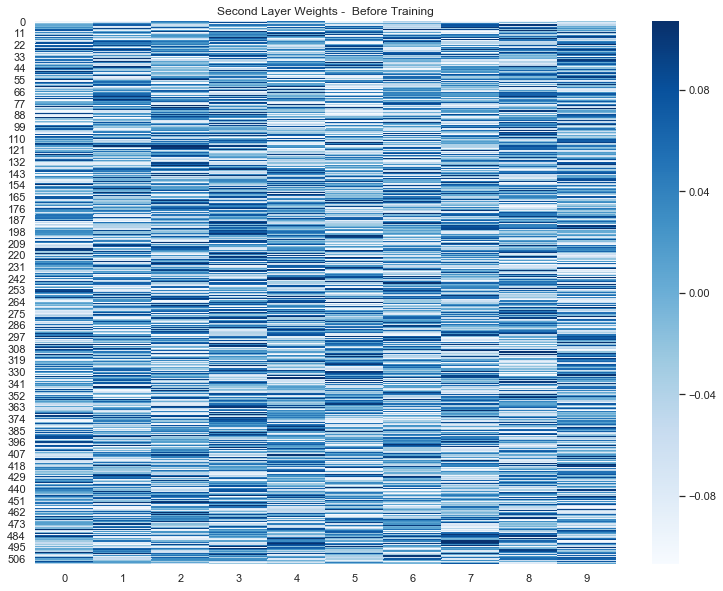

In [18]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(model.weights[2].numpy(), ax=ax, cmap="Blues")
ax.set(title='Second Layer Weights -  Before Training');

## Train Model 

In [19]:
model_history = model.fit(
    x=x_train, 
    y=y_train, 
    epochs=20, 
    batch_size=256, 
    validation_split=0.2
)

W0825 12:26:51.805477 4586493376 deprecation.py:323] From /Users/juanitorduz/anaconda3/envs/bms_summer19/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 21us/sample - loss: 0.3836 - accuracy: 0.8905 - val_loss: 0.1842 - val_accuracy: 0.9500
Epoch 2/20
48000/48000 [==============================] - 1s 15us/sample - loss: 0.1673 - accuracy: 0.9520 - val_loss: 0.1356 - val_accuracy: 0.9622
Epoch 3/20
48000/48000 [==============================] - 1s 15us/sample - loss: 0.1183 - accuracy: 0.9666 - val_loss: 0.1094 - val_accuracy: 0.9678
Epoch 4/20
48000/48000 [==============================] - 1s 16us/sample - loss: 0.0909 - accuracy: 0.9738 - val_loss: 0.0946 - val_accuracy: 0.9722
Epoch 5/20
48000/48000 [==============================] - 1s 16us/sample - loss: 0.0721 - accuracy: 0.9791 - val_loss: 0.0913 - val_accuracy: 0.9727
Epoch 6/20
48000/48000 [==============================] - 1s 16us/sample - loss: 0.0607 - accuracy: 0.9823 - val_loss: 0.0836 - val_accuracy: 0.9740
Epoch 7/20
48000/48000 [==============================] 

## Model Weight 

Let us plot the final weigth values after training:

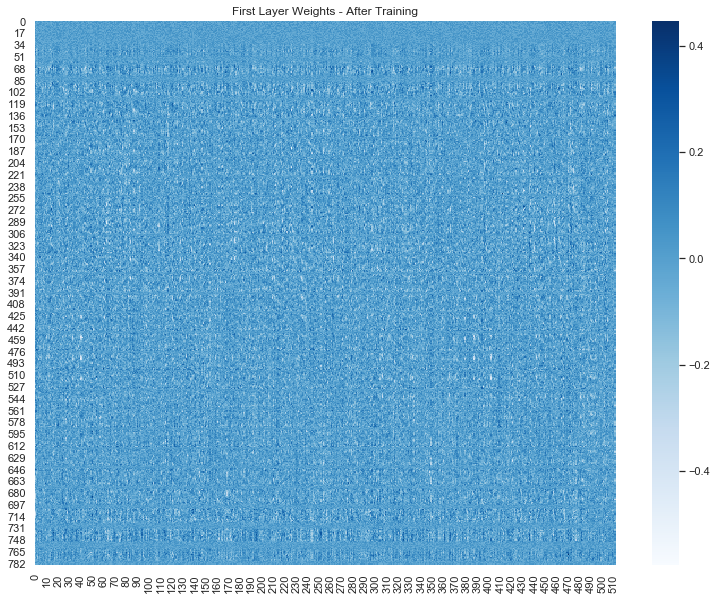

In [20]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(model.weights[0].numpy(), ax=ax, cmap="Blues")
ax.set(title='First Layer Weights - After Training');

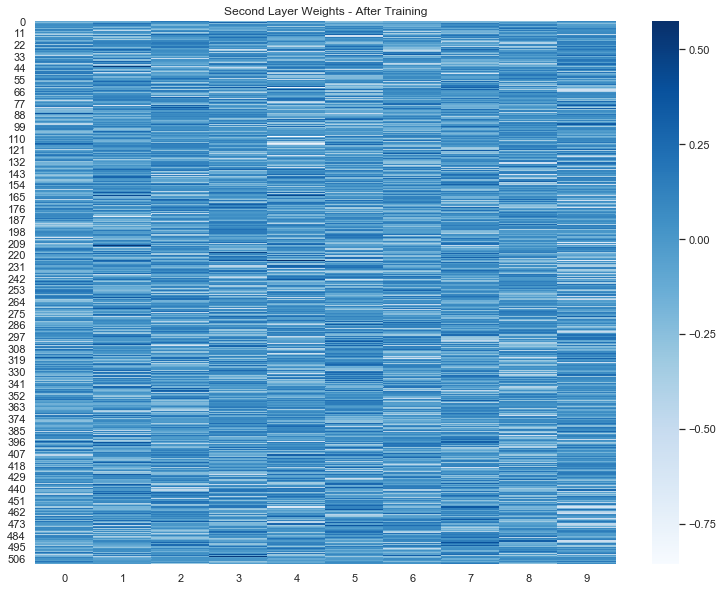

In [21]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(model.weights[2].numpy(), ax=ax, cmap="Blues")
ax.set(title='Second Layer Weights - After Training');

## Model Evaluation

In [22]:
# Store history in a data frame. 
hist_df = pd.DataFrame(model_history.history)
hist_df['epoch'] = model_history.epoch

hist_df.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.383582,0.890542,0.184237,0.950000,0
1,0.167276,0.951958,0.135629,0.962250,1
2,0.118314,0.966625,0.109440,0.967833,2
3,0.090946,0.973792,0.094616,0.972167,3
4,0.072076,0.979083,0.091324,0.972667,4


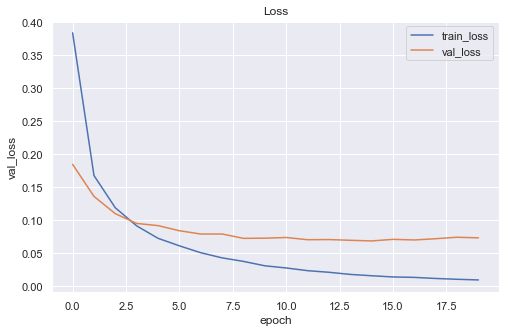

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x='epoch', y='loss', data=hist_df, ax=ax, label='train_loss')
sns.lineplot(x='epoch', y='val_loss', data=hist_df, ax=ax, label='val_loss')
ax.set(title='Loss')
ax.legend(loc='upper right');

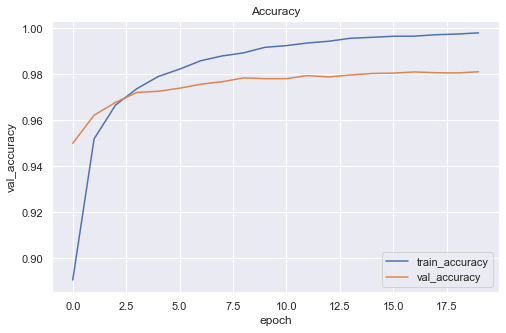

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.lineplot(x='epoch', y='accuracy', data=hist_df, ax=ax, label='train_accuracy')
sns.lineplot(x='epoch', y='val_accuracy', data=hist_df, ax=ax, label='val_accuracy')
ax.set(title='Accuracy')
ax.legend(loc='lower right');

In [25]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.0629 - accuracy: 0.9813


[0.06289993328738347, 0.9813]

In [26]:
y_pred = model.apply(x_test)

In [27]:
y_pred_classes = tf.argmax(y_pred, axis=1)

Let us see where the model did not predict the right class:

In [28]:
pred_diff = y_test - y_pred_classes.numpy()

In [29]:
indices = np.where(np.not_equal(pred_diff, 0))
indices = indices[0]

In [30]:
def get_miss_prediction(y_test, x_test, y_pred_classes, indices, i):
    
    true_label = y_test[indices[i]]
    
    pred_label = y_pred_classes.numpy()[indices[i]]
    
    y_pred_classes.numpy()[indices[i]]
    
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.heatmap(data=x_test[indices[i]], cmap='gist_gray', ax=ax)
    ax.set(title=f'True Label = {true_label} & Pred Label = {pred_label}');

### Examples

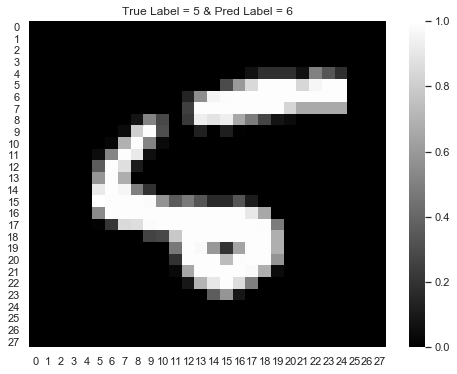

In [31]:
get_miss_prediction(y_test, x_test, y_pred_classes, indices, 0)

- Example 2

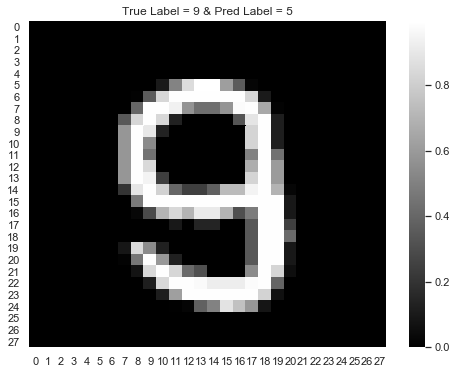

In [32]:
get_miss_prediction(y_test, x_test, y_pred_classes, indices, 3)

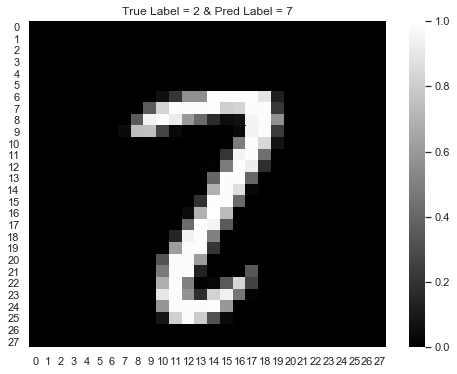

In [33]:
get_miss_prediction(y_test, x_test, y_pred_classes, indices, 5)